Линейная регрессия через библиотеку и ее улучшения

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/diamonds.csv') #датасет по бриллиантам
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Сначала фильтруем данные

In [5]:
data.drop(["cut", "color", "clarity"], axis=1).corrwith(data.price) #ценность числовых признаков к таргетному

Unnamed: 0   -0.306873
carat         0.921591
depth        -0.010647
table         0.127134
price         1.000000
x             0.884435
y             0.865421
z             0.861249
dtype: float64

In [6]:
data.isnull().any().any() #есть ли пропуски

False

In [7]:
data = data.drop('Unnamed: 0', axis=1) #удаляем ненужный столбец

In [8]:
data = pd.get_dummies(data, prefix=['cu'], columns=['cut'])
data = pd.get_dummies(data, prefix=['col'], columns=['color'])
data = pd.get_dummies(data, prefix=['clar'], columns=['clarity'])
#раскладываем нечисловые признаки на бинарные

Разбиваем выборку

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['price'], axis=1), data['price'], test_size=0.3, random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
#масштабируем

Обучаем модели

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

Проверка показателей у Линейной регрессии.

In [13]:
lr = LinearRegression().fit(X_train_scaled,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train_scaled))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test_scaled))))
print("Coeff: {}".format(lr.coef_))

Train: 1310118.7779581891
Test: 1210916.8342919892
Coeff: [ 5.27724713e+03 -8.35859541e+01 -5.68696252e+01 -1.05010216e+03
 -6.54293136e-01 -1.28889279e+01 -1.25601746e+02 -4.07564081e+01
  5.15111488e+01  1.47055432e+01  2.81697664e+00  2.09666446e+02
  1.59982203e+02  1.38024337e+02  5.73039455e+01 -1.29323243e+02
 -2.49568765e+02 -3.86217565e+02 -4.74135304e+02  2.47389557e+02
 -1.54469560e+02 -4.91150384e+02  2.05041395e+02  1.03588949e+02
  2.55165018e+02  2.71730554e+02]


Между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. На её присутствие намекают различия в порядке коэффициентов. Для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию

Проверка показателей у Lasso-регрессии. L1-регуляризация отличается функцией потерь, которую минимизирует:


$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Гиперпараметр равен 0.000001

In [29]:
lasso = Lasso(0.000001).fit(X_train_scaled,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lasso.predict(X_train_scaled))))
print ("Test: {}".format(mean_squared_error(y_test, lasso.predict(X_test_scaled))))
print("Coeff: {}".format(lasso.coef_))

Train: 1310118.7779581891
Test: 1210784.9663286225
Coeff: [ 5.27724709e+03 -8.35859507e+01 -5.68696238e+01 -1.05010212e+03
 -6.54291159e-01 -1.28889295e+01 -1.30461609e+02 -4.89692588e+01
  3.74071860e+01  2.13892097e+00 -9.18995177e+00  3.28941850e+02
  2.99117593e+02  2.74791847e+02  2.03818295e+02  2.80275755e-01
 -1.40966180e+02 -3.06791420e+02 -5.14507195e+02  1.84360582e+02
 -3.03748682e+02 -6.22192617e+02  7.95764734e+01 -4.28501113e+01
  1.66822273e+02  1.70407372e+02]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.438e+08, tolerance: 6.102e+07
  model = cd_fast.enet_coordinate_descent(


L2-регуляризация, Ridge-регрессиия, предлагает минимизировать следующую функцию потерь:


$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Гиперпараметр равен 0.00001

In [23]:
ridge = Ridge(0.00001).fit(X_train_scaled,y_train)
print ("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train_scaled))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test_scaled))))
print("Coeff: {}".format(ridge.coef_))

Train: 1310118.7779581891
Test: 1210916.8351380834
Coeff: [ 5.27724709e+03 -8.35859516e+01 -5.68696249e+01 -1.05010212e+03
 -6.54295578e-01 -1.28889322e+01 -1.25601979e+02 -4.07568020e+01
  5.15104725e+01  1.47049406e+01  2.81640105e+00  2.09667072e+02
  1.59982934e+02  1.38025055e+02  5.73047150e+01 -1.29322562e+02
 -2.49568194e+02 -3.86217147e+02 -4.74135094e+02  2.47389884e+02
 -1.54468788e+02 -4.91149706e+02  2.05042044e+02  1.03589707e+02
  2.55165476e+02  2.71731079e+02]


Оценка моделей с различным параметром регуляризации 

In [30]:
vector_ridge = []
vector_lasso = []
for element in [0.1, 1, 10, 100, 200]:
    vector_ridge.append([np.linalg.norm(Ridge(element).fit(X_train_scaled,y_train).coef_)])
    vector_lasso.append([np.linalg.norm(Lasso(element).fit(X_train_scaled,y_train).coef_)])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.494e+08, tolerance: 6.102e+07
  model = cd_fast.enet_coordinate_descent(


Lasso агрессивне уменьшает веса, что обосновывает его частое появление при отборе признаков

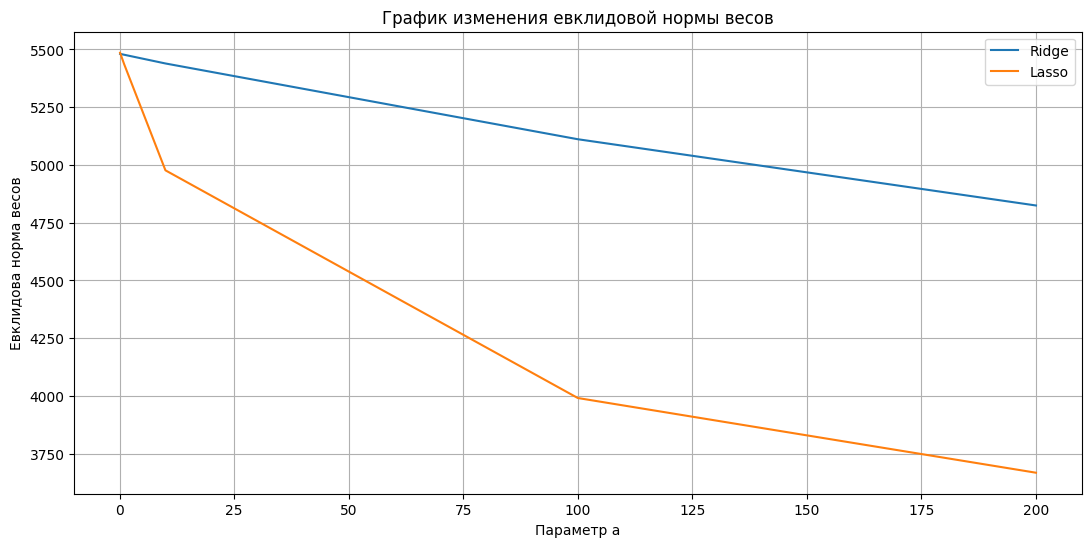

In [31]:
plt.figure(figsize=(13, 6))
plt.plot([0.1, 1, 10, 100, 200], vector_ridge, label='Ridge')
plt.plot([0.1, 1, 10, 100, 200], vector_lasso, label='Lasso')

plt.title('График изменения евклидовой нормы весов')
plt.legend()
plt.xlabel('Параметр а')
plt.ylabel(r'Евклидова норма весов')
plt.grid()
plt.show()

Применение кросс-валидации с помощью библиотеки LassoCV

In [21]:
from sklearn.linear_model import LassoCV

np.mean(LassoCV(alphas=[0.1, 1, 10, 100, 200],cv=5).fit(X_train_scaled,y_train).mse_path_, axis=1)

array([1980846.59902099, 1557941.34033576, 1323861.91280537,
       1313468.95680614, 1313490.85785815])

In [35]:
lasso = Lasso(0.00001).fit(X_train_scaled,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lasso.predict(X_train_scaled))))
print ("Test: {}".format(mean_squared_error(y_test, lasso.predict(X_test_scaled))))
print("Coeff: {}".format(lasso.coef_))

Train: 1310118.7779581996
Test: 1210784.9814345685
Coeff: [ 5.27724669e+03 -8.35859207e+01 -5.68696112e+01 -1.05010174e+03
 -6.54273368e-01 -1.28889438e+01 -1.30461834e+02 -4.89696397e+01
  3.74065258e+01  2.13832369e+00 -9.19050718e+00  3.28932310e+02
  2.99106465e+02  2.74780905e+02  2.03806577e+02  2.69909058e-01
 -1.40974849e+02 -3.06797755e+02 -5.14506538e+02  1.84361584e+02
 -3.03746300e+02 -6.22190517e+02  7.95784676e+01 -4.28477670e+01
  1.66823682e+02  1.70408986e+02]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.438e+08, tolerance: 6.102e+07
  model = cd_fast.enet_coordinate_descent(
